In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
from sklearn import preprocessing

import seaborn as sns

Veri setinde genel olarak müşteri bilgileri yer alıyor. Müşteri geliri, kablosuz internete sahip mi, longmon(uzun vadeli harcaması)

logistic regression
confusion matrix

In [27]:
df=pd.read_csv("../data/ChurnData.csv")

In [28]:
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

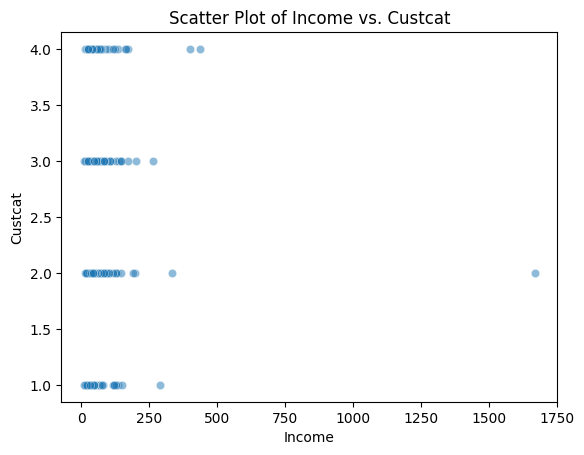

In [30]:
#Income'a göre cucat'ı görselleştirip duruma bakıyorum
# Assuming your data is stored in a DataFrame named 'df'
sns.scatterplot(x='income', y='custcat', data=df, alpha=0.5)
plt.title('Scatter Plot of Income vs. Custcat')
plt.xlabel('Income')
plt.ylabel('Custcat')
plt.show()

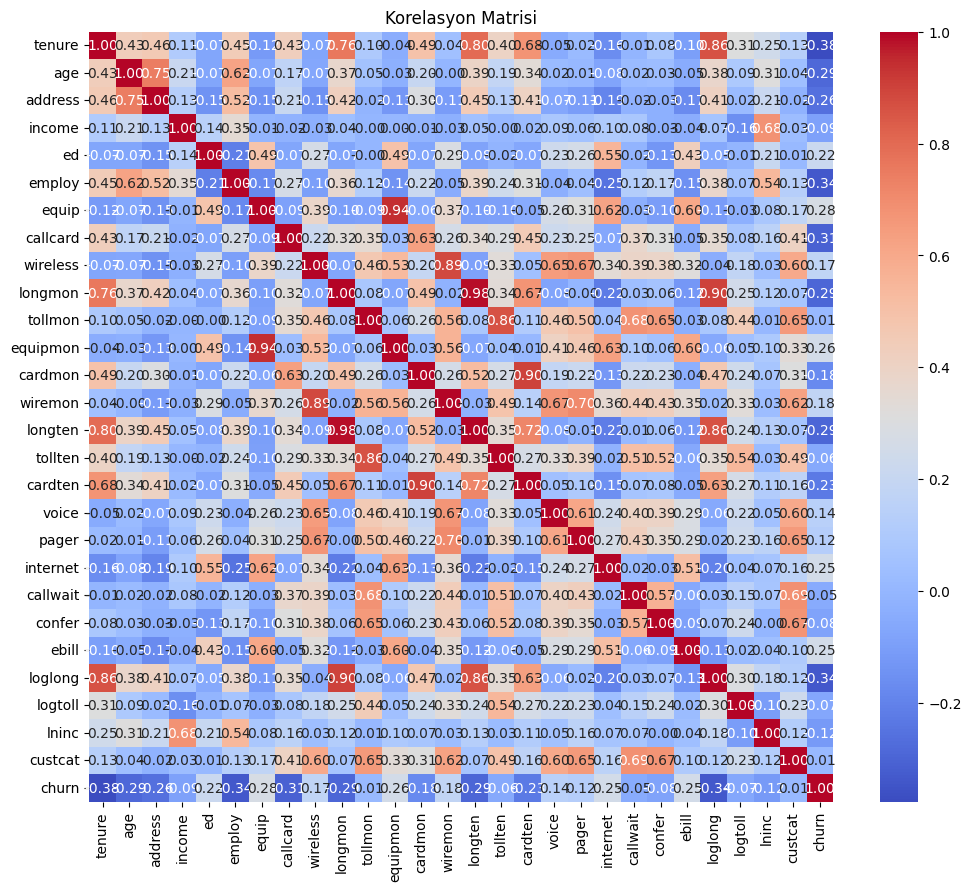

In [31]:
# Korelasyon matrisi ile ilişkilere bakmak istiyorum
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [33]:
X = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless', 'longmon']]
y = df['churn']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [35]:
#Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=40)
model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=40)

In [37]:
#
y_pred = model.predict(X_test_scaled)

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #Buradaki kütüphaneyi unutma ilk bunu yaz hep hata alıyorsun

#confusion matrix ve accuracy oluşturuyorum
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [39]:
print(f'Accuracy: {accuracy}')


Accuracy: 0.75


In [40]:
print('\nConfusion Matrix:')
print(conf_matrix)


Confusion Matrix:
[[26  2]
 [ 8  4]]


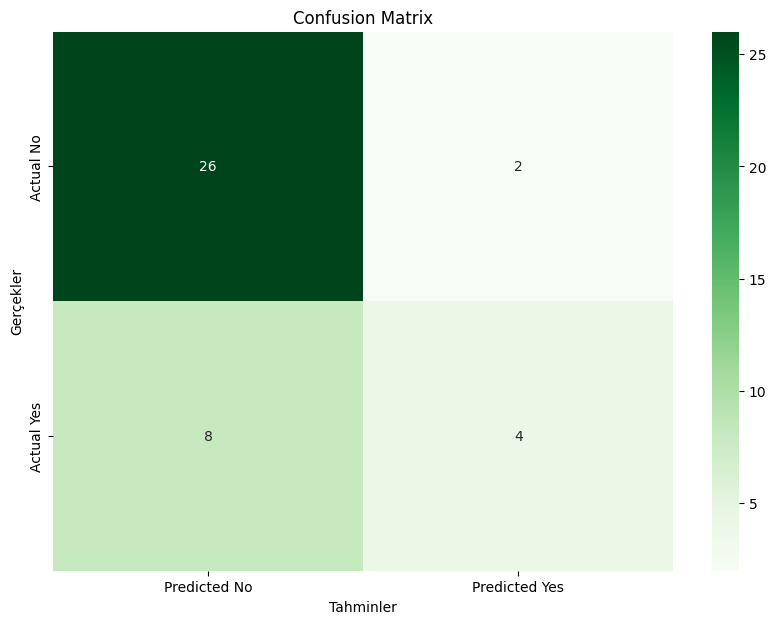

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred) #y kullanıyoruz

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predicted No', 'Predicted Yes'], 
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
#(Örnek görsele tekrar bakılacak)
plt.xlabel('Tahminler') #
plt.ylabel('Gerçekler')
plt.show()